In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
train_path = '../../input/train.csv'
test_path = '../../input/test.csv'
question_path = '../../input/question.csv'
char_embed = "../../input/char_embed.txt"
word_embed = "../../input/word_embed.txt"

In [2]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
question_df = pd.read_csv(question_path)
word_embed_df = pd.read_csv(word_embed,delim_whitespace=True,index_col=0,header=None)
char_embed_df = pd.read_csv(char_embed,delim_whitespace=True,index_col=0,header=None)

In [3]:
question_df["word_len"] = question_df["words"].apply(lambda words:len(words.split(" ")))
question_df["char_len"] = question_df["chars"].apply(lambda chars:len(chars.split(" ")))

In [4]:
question_df.head(20)

,qid,words,chars,word_len,char_len
0,Q000000,W05733 W05284 W09158 W14968 W07863,L1128 L1861 L2218 L1796 L1055 L0847 L2927,5,7
1,Q000001,W17378 W17534 W03249 W01490 W18802,L2214 L1980 L0156 L1554 L2218 L1861 L3019 L010...,5,9
2,Q000002,W17378 W08158 W20171 W11246 W14759,L2214 L2350 L2568 L1969 L2168 L0694 L3012 L256...,5,9
3,Q000003,W11385 W14103 W02556 W13157 W09749,L0762 L2172 L1971 L2034 L2039 L2271 L1346 L223...,5,9
4,Q000004,W17508 W18238 W02952 W18103,L0018 L2321 L1346 L3019 L0104 L0902 L0354 L0362,4,8
5,Q000005,W17378 W12908 W19355 W08410 W11922 W14496 W20487,L2214 L1331 L0016 L1132 L2237 L1900 L0578 L195...,7,14
6,Q000006,W04346 W17378 W06112 W05733 W18238 W05284 W118...,L2323 L1526 L2214 L0358 L1849 L1128 L1861 L301...,8,13
7,Q000007,W16696 W02556 W16564 W03914 W18103,L0366 L2028 L2034 L2039 L0605 L1824 L2292 L015...,5,9
8,Q000008,W17378 W11385 W18238 W13157 W12244 W16319 W18448,L2214 L0762 L2172 L3019 L0104 L2271 L1346 L014...,7,11
9,Q000009,W14113 W16319 W18399 W03472 W11399 W07863 W18103,L0947 L2323 L2582 L0143 L2600 L2272 L1872 L123...,7,10


In [5]:
print "We have in total %s questions!"%question_df.shape[0]

We have in total 728428 questions!


#### Let us look at the distribution of word_len

In [6]:
question_df["word_len"].describe()

count    728428.000000
mean          6.199064
std           2.567069
min           1.000000
25%           4.000000
50%           6.000000
75%           7.000000
max          39.000000
Name: word_len, dtype: float64

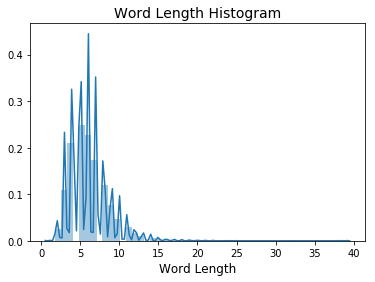

In [7]:
plt.figure()
sns.distplot(question_df["word_len"])
plt.xlabel('Word Length', fontsize=12)
plt.title("Word Length Histogram", fontsize=14)
plt.show()

#### Let us look at the distribution of char_len

In [8]:
question_df["char_len"].describe()

count    728428.000000
mean         10.292577
std           3.918596
min           2.000000
25%           8.000000
50%          10.000000
75%          12.000000
max          58.000000
Name: char_len, dtype: float64

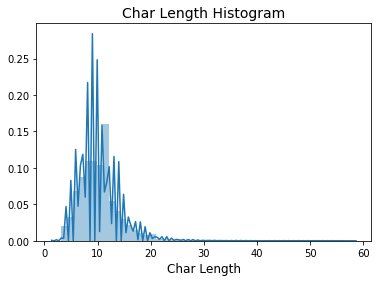

In [9]:
plt.figure()
sns.distplot(question_df["char_len"])
plt.xlabel('Char Length', fontsize=12)
plt.title("Char Length Histogram", fontsize=14)
plt.show()

#### how many unique words and chars in all questions

In [10]:
all_words = question_df["words"].values.tolist()
all_words = ' '.join(all_words)
all_unique_words = set(all_words.split(" "))
print "number of unique words in all questions is %s"%(len(all_unique_words))

number of unique words in all questions is 20890


In [11]:
word_embed_df.shape[0]
## total unique words: 20891

20891

In [12]:
all_unique_words_index = map(lambda x:int(x[1:]),all_unique_words)
for i in range(20891):
    if i not in all_unique_words_index:
        print i
## word W03790 is not in the questions

3790


In [13]:
all_chars = question_df["chars"].values.tolist()
all_chars = ' '.join(all_chars)
all_unique_chars = set(all_chars.split(" "))
print "number of unique chars in all questions is %s"%(len(all_unique_chars))

number of unique chars in all questions is 3048


In [14]:
char_embed_df.shape[0]
## all letters(chars) occur in the questions

3048

#### how many unique questions in train and test set

In [15]:
train_df.head(5)

,label,q1,q2
0,1,Q397345,Q538594
1,0,Q193805,Q699273
2,0,Q085471,Q676160
3,0,Q189314,Q438123
4,0,Q267714,Q290126


In [16]:
train_df.shape[0]
## We have totally 254,386 train pairs, and 508772 questions in train set

254386

In [30]:
train_all_qids = pd.concat([train_df["q1"],train_df["q2"]],ignore_index=True)
print "number of questions in train set:%s" % train_all_qids.shape[0]

number of questions in train set:508772


In [31]:
train_ques_fre = train_all_qids.value_counts()
print "number of unique questions in train set:%s, out of %s, ratio is:%.2f%%"%(train_ques_fre.shape[0],question_df.shape[0],
                                                                              100*train_ques_fre.shape[0]/float(question_df.shape[0]))

number of unique questions in train set:192633, out of 728428, ratio is:26.45%


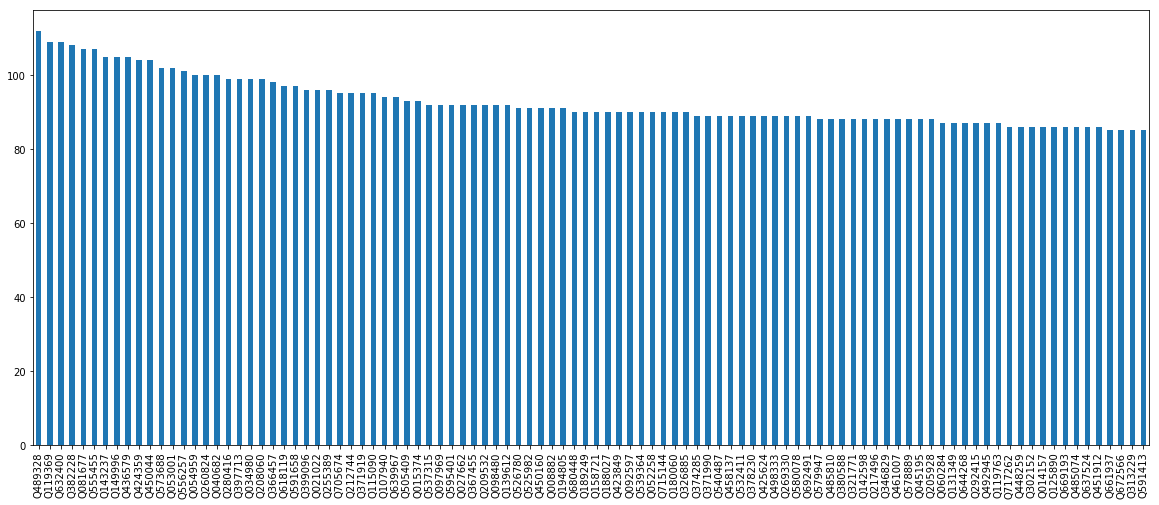

In [32]:
plt.figure(figsize=(20,8))
train_ques_fre.head(100).plot("bar")

In [39]:
train_ques_fre.describe()

count    192633.000000
mean          2.641147
std           6.092427
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         112.000000
dtype: float64

In [29]:
test_df.shape[0]
## ## We have totally 172,956 test pairs, and 345,912 questions in test set

172956

In [34]:
test_all_qids = pd.concat([test_df["q1"],test_df["q2"]],ignore_index=True)
print "number of questions in test set:%s" % test_all_qids.shape[0]

number of questions in test set:345912


In [36]:
test_ques_fre = test_all_qids.value_counts()
print "number of unique questions in test set:%s, out of %s, ratio is:%.2f%%"%(test_ques_fre.shape[0],question_df.shape[0],
                                                                              100*test_ques_fre.shape[0]/float(question_df.shape[0]))

number of unique questions in test set:248773, out of 728428, ratio is:34.15%


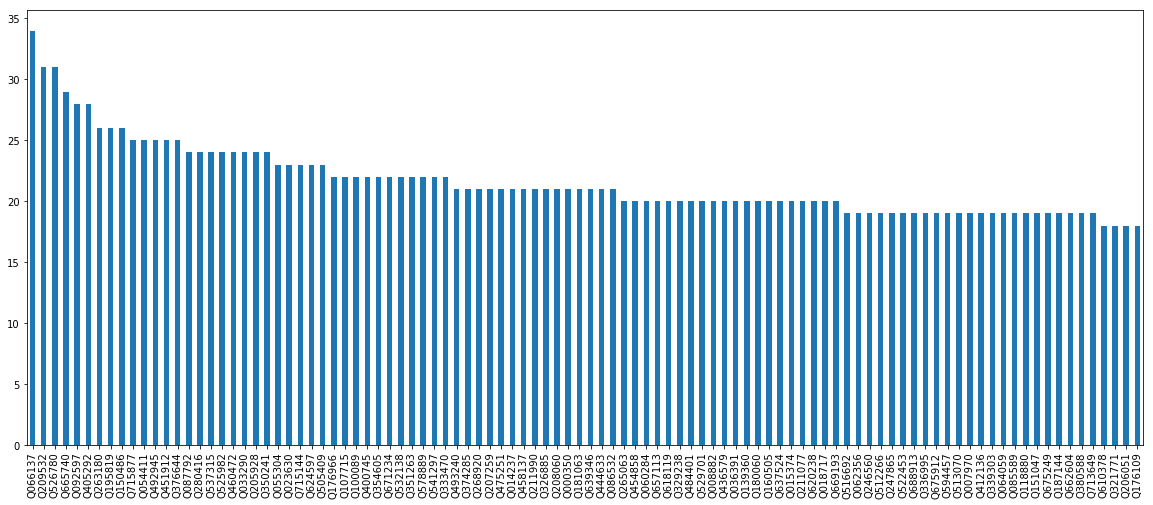

In [37]:
plt.figure(figsize=(20,8))
test_ques_fre.head(100).plot("bar")

In [40]:
test_ques_fre.describe()
## Some questions appear in the test set more often than others

count    248773.000000
mean          1.390472
std           1.192269
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          34.000000
dtype: float64